# Data@ANZ Virtual Experience Program

## Task 1: Exploratory Data Analysis

Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

In [2]:
## Loading Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("/content/ANZ synthesised transaction dataset.xlsx")

In [5]:
### Converting date to date-time format 
df["date"] = pd.to_datetime(df["date"])

In [9]:
df.shape

(12043, 23)

In [6]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [10]:
df.astype('object').describe().transpose()

,count,unique,top,freq
status,12043,2,authorized,7717
card_present_flag,7717.0,2.0,1.0,6194.0
bpay_biller_code,885,3,0,883
account,12043,100,ACC-1598451071,578
currency,12043,1,AUD,12043
long_lat,12043,100,153.41 -27.95,578
txn_description,12043,6,SALES-POS,3934
merchant_id,7717,5725,106e1272-44ab-4dcb-a438-dd98e0071e51,14
merchant_code,883.0,1.0,0.0,883.0
first_name,12043,80,Michael,746


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [12]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [14]:
data_date = df.groupby("date").count()
avg_trans_count = data_date["customer_id"].mean()
n_points = len(data_date.index)

### Customer transaction count for each day.

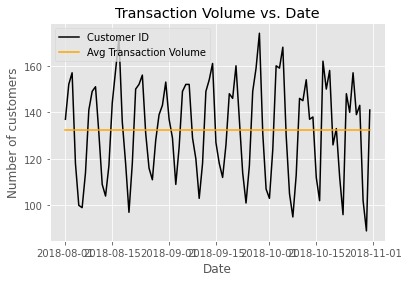

In [17]:
plt.plot(data_date.index, data_date["customer_id"], c="black", label = "Customer ID")
plt.plot(data_date.index, np.linspace(avg_trans_count,avg_trans_count,n_points), c="orange", label = "Avg Transaction Volume")
plt.title("Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()

In [16]:
print("The number of average customer transactions per day is " , avg_trans_count )

The number of average customer transactions per day is  132.34065934065933


### Mean transaction amount for each day.

In [18]:
data_date_mean = df.groupby("date").mean()
avg_trans_amt = data_date_mean["amount"].mean()
n_points = len(data_date.index)

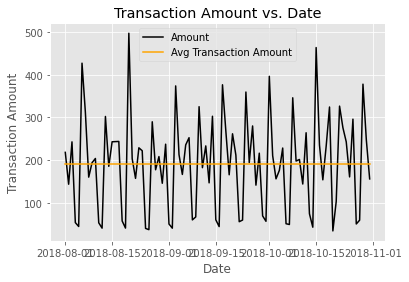

In [19]:
plt.plot(data_date_mean.index, data_date_mean["amount"], c="black", label = "Amount")
plt.plot(data_date_mean.index, np.linspace(avg_trans_amt,avg_trans_amt,n_points), c="orange", label = "Avg Transaction Amount")
plt.title("Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

### Transaction amount by age

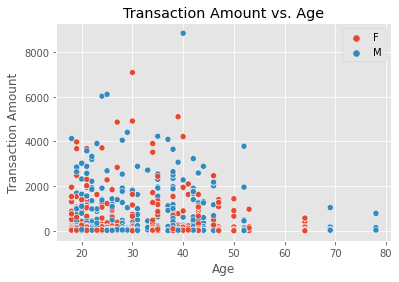

In [20]:
sns.scatterplot(data=df, x="age",hue="gender", y="amount")
plt.title("Transaction Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.legend()

### Total transaction amount by age


In [21]:
total_age_amt= df.groupby(['age',"gender"])["amount"].sum().reset_index()
total_age_amt.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


Text(0, 0.5, 'Total Transaction Amount')

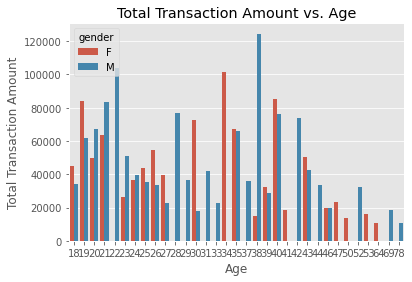

In [22]:
sns.barplot(y="amount", x="age",hue ="gender" ,data=total_age_amt)
plt.title("Total Transaction Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Total Transaction Amount")

### Movement type

In [24]:
debitorcredit= df.groupby(["movement"])["amount"].mean().reset_index()
debitorcredit

,movement,amount
0,credit,1898.728029
1,debit,52.572343


Text(0, 0.5, 'Amount')

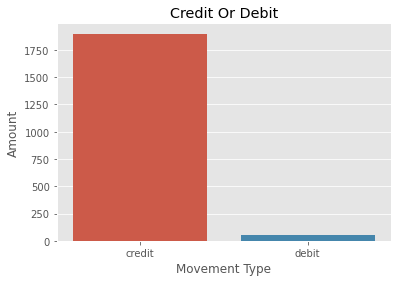

In [25]:
sns.barplot(y="amount", x="movement",data=debitorcredit)
plt.title("Credit Or Debit")
plt.xlabel("Movement Type")
plt.ylabel("Amount")

### Segregating the data by weekday,month and analyzing

In [28]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8


#### Transaction Amount for the month of August


In [29]:
data_aug = df[df["month"] == 8]
data_aug.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8


The Average Transaction amount for the month of August is -  185.12186659903654


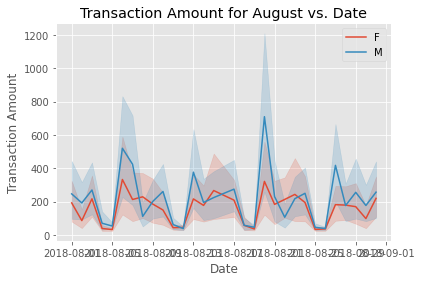

In [31]:
sns.lineplot(y="amount",x="date",hue="gender", data=data_aug)
plt.title("Transaction Amount for August vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

avg_trans_amt_aug= data_aug["amount"].mean()
print("The Average Transaction amount for the month of August is - ", avg_trans_amt_aug)

#### Transaction Amount for the month of September

In [32]:
data_sep = df[df["month"] == 9]
data_sep

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
3943,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,POS,35703b7a-216b-4a01-9056-0bfd36d2ec03,NaN,Jeffrey,...,Redbank,QLD,2018-09-01T00:35:49.000+0000,9.15,900330f3b6e64a4aa547e90ff93b8326,Australia,CUS-860700529,152.87 -27.61,debit,9
3944,authorized,1.0,NaN,ACC-2897221629,AUD,150.90 -34.37,POS,86bbe984-a9a6-48a8-a449-c59edbdf7032,NaN,Scott,...,Parramatta,NSW,2018-09-01T01:08:04.000+0000,85.84,d451a84695e6409b8e92dd45f0f28832,Australia,CUS-511326734,151.02 -33.81,debit,9
3945,authorized,1.0,NaN,ACC-2681137560,AUD,151.11 -33.99,POS,ffb4538f-cf69-434f-8c0a-5c9e7a8d359b,NaN,Nathaniel,...,Ryde,NSW,2018-09-01T01:27:18.000+0000,15.66,59377e7f435944729ed6fed10868337f,Australia,CUS-2083971310,151.11 -33.81,debit,9
3946,authorized,1.0,NaN,ACC-3541460373,AUD,145.00 -37.83,SALES-POS,727f70ec-7434-44fd-8cd7-0583a1b07097,NaN,Jeffrey,...,Bairnsdale,VIC,2018-09-01T01:46:32.000+0000,14.87,7301eeeda28a4ca3a578b2e09a786ed8,Australia,CUS-1433879684,147.63 -37.83,debit,9
3947,posted,NaN,NaN,ACC-3481401842,AUD,115.74 -31.72,PAYMENT,NaN,NaN,Tiffany,...,NaN,NaN,2018-09-01T02:00:00.000+0000,26.00,37ed6589ae98454988284d6c7e15d5c1,Australia,CUS-1669695324,NaN,debit,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,authorized,1.0,NaN,ACC-3541460373,AUD,145.00 -37.83,SALES-POS,80e385f5-f9c6-459e-9b35-84fa988fd982,NaN,Jeffrey,...,Lilydale,VIC,2018-09-30T22:50:09.000+0000,17.36,bc7ed6034bb749779138d2a1eadb4fb8,Australia,CUS-1433879684,145.36 -37.76,debit,9
7952,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,POS,3505551c-2dfe-41a4-9c7b-d36bd70ea869,NaN,Rhonda,...,Oakleigh,VIC,2018-09-30T22:57:58.000+0000,21.62,c652d138d1d541d996b5c1c90bb41eb1,Australia,CUS-1614226872,145.09 -37.9,debit,9
7953,authorized,1.0,NaN,ACC-2890243754,AUD,153.32 -27.93,SALES-POS,cf2ac034-f61a-4c17-9312-09d5c68fecb3,NaN,Joseph,...,Southport,QLD,2018-09-30T23:12:19.000+0000,8.33,6e61abc2c40c4726832dfbc6a71f806b,Australia,CUS-2695611575,153.42 -27.97,debit,9
7954,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,2bcf4f78-081b-4758-8c38-23c162ee36cd,NaN,Rhonda,...,Alexandra Hills,QLD,2018-09-30T23:28:59.000+0000,20.12,0c6e305d06c142f5b0d808ad5718c779,Australia,CUS-1614226872,153.22 -27.52,debit,9


The Average Transaction amount for the month of September is -  182.04590331422853


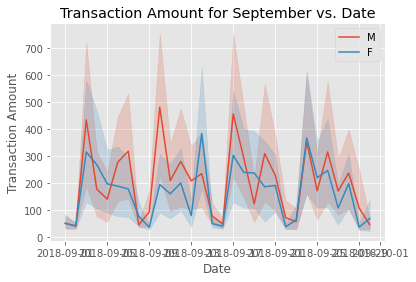

In [33]:
sns.lineplot(y="amount",x="date",hue="gender", data=data_sep)
plt.title("Transaction Amount for September vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

avg_trans_amt_sep= data_sep["amount"].mean()
print("The Average Transaction amount for the month of September is - ", avg_trans_amt_sep)

#### Transaction amount for the month of October

In [34]:
data_oct = df[df["month"] == 10]
data_oct.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
7956,authorized,0.0,NaN,ACC-1222300524,AUD,151.23 -33.94,SALES-POS,7163ba4e-86e2-4146-b5e1-033b0a1d43d2,NaN,Michael,...,Melbourne,VIC,2018-10-01T00:23:19.000+0000,29.57,f077102cbe80453eabf96683eafc8496,Australia,CUS-2142601169,144.98 -37.84,debit,10
7957,authorized,0.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,aee28413-5126-40ac-909a-2d91cafad528,NaN,Michael,...,Macquarie Park,NSW,2018-10-01T01:26:53.000+0000,8.44,0c9bdb3d9298473b9f47dc08988c8d7a,Australia,CUS-2142601169,151.12 -33.78,debit,10
7958,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,NaN,NaN,2018-10-01T02:00:00.000+0000,163.00,ba88c103199c4464adc354c940c5b4c0,Australia,CUS-2688605418,NaN,debit,10
7959,authorized,0.0,NaN,ACC-958000567,AUD,130.90 -12.37,POS,4179a6ae-b81c-4c3f-82bb-e9868d7d1437,NaN,Sandra,...,Helensvale,QLD,2018-10-01T02:09:59.000+0000,10.65,404d08614d8a4dfa991bcfaec12ee79d,Australia,CUS-4142663097,153.32 -27.9,debit,10
7960,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,INTER BANK,NaN,NaN,Matthew,...,NaN,NaN,2018-10-01T03:00:00.000+0000,33.00,eee15b6732fa4f2eafc74f92b77de5e8,Australia,CUS-1790886359,NaN,debit,10


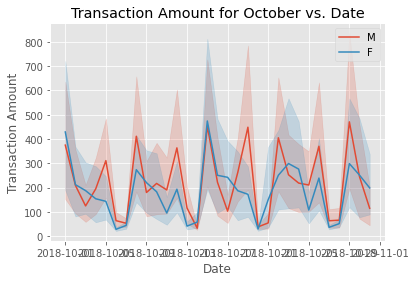

In [35]:
sns.lineplot(y="amount",x="date",hue="gender", data=data_oct)
plt.title("Transaction Amount for October vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

In [36]:
avg_trans_amt_oct= data_oct["amount"].mean()
print("The Average Transaction amount for the month of October is - ", avg_trans_amt_oct)

The Average Transaction amount for the month of October is -  196.42732321996542
